# 1. Import Library

In [1]:
import numpy as np
from numpy.linalg import inv
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import random

# 2. Write Function

## 2.1 Linear Regression

In [2]:
def LR_find_r(X, Y):
    Xmean = X.mean()
    Ymean = Y.mean()
    fraction = ((X - Xmean)*(Y - Ymean)).sum()
    denorminator = np.sqrt(((X - Xmean)**2).sum()*((Y - Ymean)**2).sum())
    r = fraction/denorminator
    return r

In [3]:
def LR_find_ab(X, Y):
    XY = X*Y
    X2 = X**2
    Xmean = X.mean()
    Ymean = Y.mean()
    XYmean = XY.mean()
    X2mean = X2.mean()
    denorminator = X2mean - Xmean**2
    a = (XYmean - Xmean*Ymean)/denorminator
    b = (X2mean*Ymean - Xmean*XYmean)/denorminator
    return a, b

In [4]:
def LR_find_Yhat(X, a, b):
    Yhat = a*X + b
    return Yhat

## 2.2 Multiple Regression

In [5]:
def MR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [6]:
def MR_find_W(X, Y):
    Xb = MR_create_Xb(X)
    front = inv(np.dot(Xb.T, Xb))
    back = np.dot(X.T, Y)
    W = np.dot(front, back)
    return W

In [7]:
def MR_find_Yhat(X, W):
    Xb = MR_create_Xb(X)
    Yhat = np.dot(Xb, W)
    return Yhat

In [8]:
def MR_find_W_local(X, Y, epoch = 1000, lr = 0.01, batch_size = 64, lambda1 = 0, lambda2 = 0):
    Xb = MR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        #============== Batch Mode =============#
        if batch_size == N: #Batch
            Yhat = MR_find_Yhat(X, W)
            error = find_error(Y, Yhat, 'SSE')
            error_list.append(error)
            S = np.dot(Xb.T, Y - Yhat)
        elif batch_size != N: #Batch Mode(Mini, Stochastic)
            X_mb, Y_mb = shuffle(X, Y, N, batch_size) #===shuffle===#
            Xb_mb = MR_create_Xb(X_mb)
            Yhat_mb = MR_find_Yhat(X_mb, W)
            error = find_error(Y_mb, Yhat_mb, 'SSE')
            error_list.append(error)
            S = np.dot(Xb_mb.T, Y_mb - Yhat_mb)
        W = W + (lr/batch_size)*S - lambda1*np.sign(W) - lambda2*W
    return W, error_list

## 2.3 Logistic Regression

In [9]:
def LoR_create_Xb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [10]:
def LoR_find_W_local(X, Y, epoch = 1000, lr = 1, batch_size = 64, lambda1 = 0, lambda2 = 0):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        #============== Batch Mode =============#
        if batch_size == N:   #Batch
            Yhat = LoR_find_Yhat(X, W)
            error = find_error(Y, Yhat, 'Entropy')
            error_list.append(error)
            S = np.dot(Xb.T, Y - Yhat)
        elif batch_size != N:  #Batch Mode(Mini, Stochastic)
            X_mb, Y_mb = shuffle(X, Y, N, batch_size) #===shuffle===#
            Xb_mb = LoR_create_Xb(X_mb)
            Yhat_mb = LoR_find_Yhat(Xb_mb, W)
            error = find_error(Y_mb, Yhat_mb, 'Entropy')
            error_list.append(error)
            S = np.dot(Xb_mb.T, Y_mb - Yhat_mb)
        W = W + (lr/batch_size)*S - lambda1*np.sign(W) - lambda2*W
    return W, error_list

In [11]:
def LoR_find_Yhat(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = 1/(1 + np.exp(-Z))
    return Yhat

In [12]:
def LoR_find_W_local_mul_class(X, Y, epoch = 1000, lr = 1, batch_size = 64, lambda1 = 0, lambda2 = 0):
    Xb = LoR_create_Xb(X)
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    K = Y.shape[1]
    W = np.random.randn(D_1, K)/np.sqrt(D_1)
    error_list = []
    for i in range(epoch):
        #============== Batch Mode =============#
        if batch_size == N:   #Batch
            Yhat = LoR_find_Yhat_mul_class(X, W)
            error = find_error(Y, Yhat, 'Entropy')
            error_list.append(error)
            S = np.dot(Xb.T, Y-Yhat)
        elif batch_size != N: #Batch Mode(Mini, Stochastic)
            X_mb, Y_mb = shuffle(X, Y, N, batch_size) #===shuffle===#
            Xb_mb = LoR_create_Xb(X_mb)
            Yhat_mb = LoR_find_Yhat_mul_class(X_mb, W)
            error = find_error(Y_mb, Yhat_mb, 'Entropy')
            error_list.append(error)
            S = np.dot(Xb_mb.T, Y-mb - Yhat_mb)
        W = W + (lr/batch_size)*S - lambda1*np.sign(W) - lambda2*W
    return W, error_list

In [13]:
def LoR_find_Yhat_mul_class(X, W):
    Xb = LoR_create_Xb(X)
    Z = np.dot(Xb, W)
    Yhat = np.exp(Z)/np.exp(Z).sum(axis=1, keepdims = True)
    return Yhat

## 2.4 Neural Network

In [14]:
def NN_create_WB(A0, HL):
    W = []
    B = []
    for i in range(len(HL)):
        if i == 0:
            W_i = np.random.randn(A0.shape[1], HL[0])/np.sqrt(HL[0])
        else:
            W_i = np.random.randn(HL[i-1], HL[i])/np.sqrt(HL[i])
        B_i = np.random.randn(1, HL[i])/np.sqrt(HL[i])
        W.append(W_i)
        B.append(B_i)
    return W, B

In [15]:
def NNR_find_WB(A0, T, HL, AF, epoch = 1000, lr = 0.01, batch_size = 64, lambda1 = 0, lambda2 = 0, dropout = False, prob_drop = [0]):
    L = len(HL)
    N = A0.shape[0]
    W, B = NN_create_WB(A0, HL)
    error_list = []
    for i in range(epoch):
        #============== Batch Mode =============#
        if batch_size == N: #Batch
            Z, A = NN_forward(A0, W, B, AF)
            error = find_error(T, A[-1], 'SSE')
            error_list.append(error)
            SW, SB = NNR_backpropagation(A0, W, B, Z, A, T, AF, dropout, prob_drop)
            
        elif batch_size != N:    #Batch Mode(Mini, Stochastic)
            A0_mb, T_mb = shuffle(A0, T, N, batch_size)   #===shuffle===#
            Z_mb, A_mb = NN_forward(A0_mb, W, B, AF)
            error = find_error(T_mb, A_mb[-1], 'SSE')
            error_list.append(error)
            SW, SB = NNR_backpropagation(A0_mb, W, B, Z_mb, A_mb, T_mb, AF, dropout, prob_drop)
        for j in range(L):
            W[j] = W[j] + (lr/batch_size)*SW[j] - lambda1*np.sign(W[j]) - lambda2*W[j]
            B[j] = B[j] + (lr/batch_size)*SB[j] - lambda1*np.sign(B[j]) - lambda2*B[j]
    return W, B, error_list

In [16]:
def NNC_find_WB(A0, T, HL, AF, epoch = 1000, lr = 0.01, batch_size = 64, lambda1 = 0, lambda2 = 0, dropout = False, prob_drop = [0]):
    L = len(HL)
    N = A0.shape[0]
    W, B = NN_create_WB(A0, HL)
    error_list = []
    for i in range(epoch):
        #============== Batch Mode =============#
        if batch_size == N:  #Batch
            Z, A = NN_forward(A0, W, B, AF)
            error = find_error(T, A[-1], 'Entropy')
            error_list.append(error)
            SW, SB = NNC_backpropagation(A0, W, B, Z, A, T, AF, dropout, prob_drop)
        elif batch_size != N: #Batch Mode(Mini, Stochastic)
            A0_mb, T_mb = shuffle(A0, T, N, batch_size)   #===shuffle===#
            Z_mb, A_mb = NN_forward(A0_mb, W, B, AF)
            error = find_error(T_mb, A_mb[-1], 'Entropy')
            error_list.append(error)
            SW, SB = NNC_backpropagation(A0_mb, W, B, Z_mb, A_mb, T_mb, AF, dropout, prob_drop)
        for j in range(L):
            W[j] = W[j] + (lr/batch_size)*SW[j] - lambda1*np.sign(W[j]) - lambda2*W[j]
            B[j] = B[j] + (lr/batch_size)*SB[j] - lambda1*np.sign(B[j]) - lambda2*B[j]
    return W, B, error_list

In [17]:
def NN_forward(A0, W, B, AF):
    Z = []
    A = []
    for i in range(len(AF)):
        if i == 0:
            Z_i = np.dot(A0, W[i]) + B[i]
        else:
            Z_i = np.dot(A[-1], W[i]) + B[i]
        A_i = NN_compute_A(Z_i, AF[i])
        Z.append(Z_i)
        A.append(A_i)
    return Z, A

In [18]:
def NN_compute_A(Z_i, af):
    if type(af) == str:
        if af == 'sigmoid':
            A_i = 1/(1 + np.exp(-Z_i))
        elif af == 'tanh':
            A_i = (np.exp(Z_i) - np.exp(-Z_i))/(np.exp(Z_i) + np.exp(-Z_i))
        elif af == 'ReLU':
            A_i = Z_i * (Z_i > 0)
        elif af == 'softmax':
            A_i = np.exp(Z_i)/np.exp(Z_i).sum(axis=1, keepdims = True)
    elif type(af) == list:
        if af[0] == 'PReLU':
            A_i = Z_i * (Z_i > 0) + af[1] * Z_i * (Z_i <= 0)
    return A_i

In [19]:
#=================== Regression =======================#
#---- W(m) = W(m) + (α* A(m-1)^T *Err(m))/N -----#
def NNR_backpropagation(A0, W, B, Z, A, T, AF, dropout, prob_drop):
    L = len(AF)
    SW = []
    SB = []
    
    #---- dropout Node => W(m) ----#
    if dropout == True:
        DN = NN_random_DN(HL, prob_drop)
        
    for i in range(L - 1, -1, -1): #ย้อนกลับทีละหนึ่ง Step หลังไปหน้า (out -> in) (-1)
        if i == L - 1:
            Delta_i = T - A[-1] #layer แรก (output) δ(m) = T - A(m)
        else:
            Delta_i = np.dot(Err_i, W[i+1].T) # δ(m) = Err(m+1)*W(m+1)^T
            
        Diff_i = NN_compute_Diff(Z[i], A[i], AF[i]) # Diff -> Activation function
        Err_i = NN_compute_Err(Delta_i, Diff_i)  #Err(m+1) = δ(m) * Diff(m)
        
        #---- W(m) ---#
        if dropout == False:
            if i != 0:
                SW_i = np.dot(A[i-1].T, Err_i) #layer ต่อๆมา # W(m) = A(m-1)^T *Err(m)
            else:
                SW_i = np.dot(A0.T, Err_i) #layer แรก (output) # W(1) = A(0)^T *Err(1)
            SB_i = Err_i.sum(axis=0) #รวมกันแนวตั้ง
        
        #---- dropout W(m) ----#
        elif dropout == True:
            if i != 0:
                SW_i = np.dot((A[i-1]*DN[i-1]).T, Err_i) #layer ต่อๆมา # W(m) = A(m-1)^T *Err(m)
            else:
                SW_i = np.dot(A0.T, Err_i) #layer แรก (output) # W(1) = A(0)^T *Err(1)
            if i == L - 1:
                SB_i = Err_i.sum(axis=0) #รวมกันแนวตั้ง Layer สุดท้าย
            else:
                SB_i = (Err_i*DN[i]).sum(axis=0) #รวมกันแนวตั้ง
                
        SW.append(SW_i) # Err_i -> SW_i -> SW -> W(m) or Wight
        SB.append(SB_i) # bias
    return SW[::-1], SB[::-1] # -1 กลับด้าน Array matrix ให้เรียง forward

In [20]:
#=================== Classification =======================#
#---- W(m) = W(m) + (α* A(m-1)^T *Err(m))/N -----#
def NNC_backpropagation(A0, W, B, Z, A, T, AF, dropout, prob_drop):
    L = len(AF)
    SW = []
    SB = []
    
    #---- dropout Node => W(m) ----#
    if dropout == True:
        DN = NN_random_DN(HL, prob_drop)
        
    for i in range(L - 1, -1, -1): #ย้อนกลับทีละหนึ่ง Step หลังไปหน้า (out -> in) (-1)
        if i == L - 1:
            Delta_i = T - A[i] #layer แรก (output) δ(m) = T - A(m)
            Diff_i = 1  # Diff_i = 1 ตามการ Diff simoid function ใน layer แรก (output)
        else:
            Delta_i = np.dot(Err_i, W[i+1].T)   # δ(m) = Err(m+1)*W(m+1)^T
            Diff_i = NN_compute_Diff(Z[i], A[i], AF[i])   # Diff -> Activation function  
        
        Err_i = NN_compute_Err(Delta_i, Diff_i)   #Err(m+1) = δ(m) * Diff(m)
        
         #---- W(m) ---#
        if dropout == False:
            if i != 0:
                SW_i = np.dot(A[i-1].T, Err_i) #layer ต่อๆมา # W(m) = A(m-1)^T *Err(m)
            else:
                SW_i = np.dot(A0.T, Err_i) #layer แรก (output) # W(1) = A(0)^T *Err(1)
            SB_i = Err_i.sum(axis=0)  #รวมกันแนวตั้ง
        
        #---- dropout W(m) ----#
        elif dropout == True:
            if i != 0:
                SW_i = np.dot((A[i-1]*DN[i-1]).T, Err_i) #layer ต่อๆมา # W(m) = A(m-1)^T *Err(m)
            else:
                SW_i = np.dot(A0.T, Err_i) #layer แรก (output) # W(1) = A(0)^T *Err(1)
            if i == L - 1:
                SB_i = Err_i.sum(axis=0)  #รวมกันแนวตั้ง
            else:
                SB_i = (Err_i*DN[i]).sum(axis=0)  #รวมกันแนวตั้ง
        
        SW.append(SW_i)  # Err_i -> SW_i -> SW -> W(m) or Wight
        SB.append(SB_i) # bias
    return SW[::-1], SB[::-1] # -1 กลับด้าน Array matrix ให้เรียง forward

In [21]:
#https://phyblas.hinaboshi.com/numa15
def NN_random_DN(HL, prob_drop):
    DN = []
    for i in range(len(HL)):
        Dropout_Node = np.random.choice([False, True], [1, HL[i]], p = [prob_drop[i], 1 - prob_drop[i]])
        DN.append(Dropout_Node)
    return DN

In [22]:
def NN_compute_Diff(Z_i, A_i, af):
    if type(af) == str:
        if af == 'sigmoid':
            Diff_i = A_i * (1 - A_i)
        elif af == 'tanh':
            Diff_i = 1 - A_i**2
        elif af == 'ReLU':
            Diff_i = (Z_i > 0)
    elif type(af) == list:
        if af[0] == 'PReLU':
            Diff_i = (Z_i > 0) + af[1] * (Z_i <= 0)
    return Diff_i

In [23]:
def NN_compute_Err(Delta_i, Diff_i):
    Err_i = Delta_i * Diff_i
    return Err_i

## 2.5 Error Function

In [24]:
def find_error(Y, Yhat, TypeOfError):
    if TypeOfError == 'SSE':
        error = find_SSE(Y, Yhat)
    elif TypeOfError == 'MSE':
        error = find_MSE(Y, Yhat)
    elif TypeOfError == 'MAE':
        error = find_MAE(Y, Yhat)
    elif TypeOfError == 'MAPE':
        error = find_MAPE(Y, Yhat)
    elif TypeOfError == 'Entropy':
        error = find_Entropy(Y, Yhat)
    elif TypeOfError == 'Binary':
        error = find_error_bin_class(Y, Yhat)
    elif TypeOfError == 'Multiclass':
        error = find_error_mul_class(Y, Yhat)
    return error

In [25]:
def find_SSE(Y, Yhat):
    SSE = ((Y - Yhat)**2).sum()
    return SSE

In [26]:
def find_MSE(Y, Yhat):
    N = Y.shape[0]
    SSE = ((Y - Yhat)**2).sum()
    MSE = SSE/N
    return MSE

In [27]:
def find_MAE(Y, Yhat):
    N = Y.shape[0]
    MAE = (np.abs(Y - Yhat)).sum()/N
    return MAE

In [28]:
def find_MAPE(Y, Yhat):
    N = Y.shape[0]
    MAPE = np.abs((Y - Yhat)/Y).sum()*100/N
    return MAPE

In [29]:
def find_Entropy(Y, Yhat):
    error = (-Y*np.log(Yhat)).sum()
    return error

In [30]:
def find_error_bin_class(Y, Yhat):
    N = Y.shape[0]
    _Y = np.round(Y, 0)
    _Yhat = np.round(Yhat, 0)
    error = 100*(_Y != _Yhat).sum()/N
    return error

In [31]:
def find_error_mul_class(Y, Yhat):
    N = Y.shape[0]
    Y_argmax = np.argmax(Y, axis=1)
    Yhat_argmax = np.argmax(Yhat, axis=1)
    error = 100*(Y_argmax != Yhat_argmax).sum()/N
    return error

## 2.6 Normalization

### 2.6.1 Finding _min, _max, _mean, _std, _ed

In [32]:
def min4norm(Data):
    _min = Data.min(axis=0)
    return _min.reshape(1, -1)

In [33]:
def max4norm(Data):
    _max = Data.max(axis=0)
    return _max.reshape(1, -1)

In [34]:
def mean4norm(Data):
    _mean = Data.mean(axis=0)
    return _mean.reshape(1, -1)

In [35]:
def std4norm(Data):
    _std = Data.std(axis=0)
    return _std.reshape(1, -1)

In [36]:
def ed4norm(Data):
    _ed = np.sqrt((Data**2).sum(axis=0))
    return _ed.reshape(1, -1)

### 2.6.2 Normalization

In [37]:
def minmaxNorm(Data, _min, _max):
    Data_Norm = (Data - _min)/(_max - _min)
    return Data_Norm

In [38]:
def rescale(Data, _min, _max, min_norm, max_norm):
    Data_Norm = (max_norm - min_norm)*((Data - _min)/(_max - _min)) + min_norm
    return Data_Norm

In [39]:
def meanNorm(Data, _min, _max, _mean):
    Data_Norm = (Data - _mean)/(_max - _min)
    return Data_Norm

In [40]:
def standardization(Data, _mean, _std):
    Data_Norm = (Data - _mean)/_std
    return Data_Norm

In [41]:
def SUL(Data, _ed):
    Data_Norm = Data/_ed
    return Data_Norm

### 2.6.3 Denormalization

In [42]:
def de_minmaxNorm(Data_Norm, _min, _max):
    Data = Data_Norm*(_max - _min) + _min
    return Data

In [43]:
def de_rescale(Data_Norm, _min, _max, min_norm, max_norm):
    Data = (_max - _min)*((Data_Norm - min_norm)/(max_norm - min_norm)) + _min
    return Data

In [44]:
def de_meanNorm(Data_Norm, _min, _max, _mean):
    Data = Data_Norm*(_max - _min) + _mean
    return Data

In [45]:
def de_standardization(Data_Norm, _mean, _std):
    Data = Data_Norm*_std + _mean
    return Data

In [46]:
def de_SUL(Data_Norm, _ed):
    Data = Data_Norm*_ed
    return Data

## 2.7 ETC

In [47]:
def create_onehot_target(label):
    K = len(np.unique(label))
    N = label.shape[0]
    onehot = np.zeros([N, K])
    for i in range(N):
        onehot[i, label[i, 0]] = 1
    return onehot

In [48]:
def shuffle(X, Y, N, batch_size):
    r = random.sample(range(N), batch_size)
    X_mb = X[r]
    Y_mb = Y[r]
    return X_mb, Y_mb

# 3. Normalization

In [49]:
def min4norm(Data):
    _min = Data.min(axis=0)
    return _min.reshape(1, -1)

In [50]:
def max4norm(Data):
    _max = Data.max(axis=0)
    return _max.reshape(1, -1)

In [51]:
def mean4norm(Data):
    _mean = Data.mean(axis=0)
    return _mean.reshape(1, -1)

In [52]:
def std4norm(Data):
    _std = Data.std(axis=0)
    return _std.reshape(1, -1)

In [53]:
def ed4norm(Data):
    _ed = np.sqrt((Data**2).sum(axis=0))
    return _ed.reshape(1, -1)

In [54]:
def minmaxNorm(Data, min_norm, max_norm):
    Data_Norm = (Data - min_norm)/(max_norm - min_norm)
    return Data_Norm

In [55]:
def meanNorm(Data, min_norm, max_norm, mean_norm):
    Data_Norm = (Data - mean_norm)/(max_norm - min_norm)
    return Data_Norm

In [56]:
def standardization(Data, mean_norm, std_norm):
    Data_Norm = (Data - mean_norm)/std_norm
    return Data_Norm

In [57]:
def SUL(Data, ed_norm):
    Data_Norm = Data/ed_norm
    return Data_Norm

In [58]:
def de_minmaxNorm(Data_Norm, min_norm, max_norm):
    Data = Data_Norm*(max_norm - min_norm) + min_norm
    return Data

In [59]:
def de_meanNorm(Data_Norm, min_norm, max_norm, mean_norm):
    Data = Data_Norm*(max_norm - min_norm) + mean_norm
    return Data

In [60]:
def de_standardization(Data_Norm, mean_norm, std_norm):
    Data = Data_Norm*std_norm + mean_norm
    return Data

In [61]:
def de_SUL(Data_Norm, ed_norm):
    Data = Data_Norm*ed_norm
    return Data

# 4. Read Data & Prepare Data

In [62]:
Data = pd.read_excel('EURUSD.xlsx', usecols = 'N:AC', skiprows = range(1, 6))

In [63]:
Data

,High 5,High 4,High 3,High 2,High 1,Low 5,Low 4,Low 3,Low 2,Low 1,EMA 5 High 1,EMA 5 Low 1,Upper Band 5 Close 1,Lower Band 5 Close 1,Open 0,Target High 0
0,1.13009,1.14506,1.14438,1.15077,1.15366,1.12014,1.12723,1.13265,1.13006,1.14346,1.144792,1.130708,1.157813,1.124715,1.14888,1.16229
1,1.14506,1.14438,1.15077,1.15366,1.16229,1.12723,1.13265,1.13006,1.14346,1.14888,1.139891,1.127185,1.158828,1.134312,1.15357,1.15739
2,1.14438,1.15077,1.15366,1.16229,1.15739,1.13265,1.13006,1.14346,1.14888,1.14620,1.141614,1.127200,1.160360,1.135908,1.15120,1.15370
3,1.15077,1.15366,1.16229,1.15739,1.15370,1.13006,1.14346,1.14888,1.14620,1.14667,1.142536,1.129017,1.154614,1.146826,1.14913,1.14967
4,1.15366,1.16229,1.15739,1.15370,1.14967,1.14346,1.14888,1.14620,1.14667,1.13744,1.145281,1.129365,1.159082,1.137762,1.13775,1.15766
5,1.16229,1.15739,1.15370,1.14967,1.15766,1.14888,1.14620,1.14667,1.13744,1.13675,1.148074,1.134063,1.162811,1.137345,1.16564,1.17353
6,1.15739,1.15370,1.14967,1.15766,1.17353,1.14620,1.14667,1.13744,1.13675,1.16205,1.152813,1.139002,1.170288,1.134424,1.16520,1.17146
7,1.15370,1.14967,1.15766,1.17353,1.17146,1.14667,1.13744,1.13675,1.16205,1.15998,1.154338,1.141401,1.179035,1.133353,1.16989,1.17437
8,1.14967,1.15766,1.17353,1.17146,1.17437,1.13744,1.13675,1.16205,1.15998,1.16610,1.154126,1.143158,1.182779,1.136713,1.16654,1.17266
9,1.15766,1.17353,1.17146,1.17437,1.17266,1.13675,1.16205,1.15998,1.16610,1.16181,1.152640,1.141252,1.175259,1.156477,1.16877,1.18363


In [64]:
DataMatrix = Data.values

In [65]:
DataMatrix.shape

(4193, 16)

In [66]:
A0 = DataMatrix[:, :15]

In [67]:
T = DataMatrix[:, 15:]

In [68]:
A0

array([[1.13009   , 1.14506   , 1.14438   , ..., 1.15781257, 1.12471543,
        1.14888   ],
       [1.14506   , 1.14438   , 1.15077   , ..., 1.15882751, 1.13431249,
        1.15357   ],
       [1.14438   , 1.15077   , 1.15366   , ..., 1.16035983, 1.13590817,
        1.1512    ],
       ...,
       [1.11724   , 1.11433   , 1.11797   , ..., 1.12897491, 1.10785709,
        1.12515   ],
       [1.11433   , 1.11797   , 1.12619   , ..., 1.12952437, 1.11089963,
        1.12204   ],
       [1.11797   , 1.12619   , 1.12774   , ..., 1.13039605, 1.11587595,
        1.12752   ]])

In [69]:
T

array([[1.16229],
       [1.15739],
       [1.1537 ],
       ...,
       [1.13065],
       [1.1309 ],
       [1.13477]])

In [70]:
A0_Train = A0[:-150, :]
T_Train = T[:-150, :]

In [71]:
A0_Test = A0[-150:, :]
T_Test = T[-150:, :]

# 5. Create Model

In [72]:
min_A0_Train = min4norm(A0_Train)
max_A0_Train = max4norm(A0_Train)
mean_A0_Train = mean4norm(A0_Train)
std_A0_Train = std4norm(A0_Train)
ed_A0_Train = ed4norm(A0_Train)

min_T_Train = min4norm(T_Train)
max_T_Train = max4norm(T_Train)
mean_T_Train = mean4norm(T_Train)
std_T_Train = std4norm(T_Train)
ed_T_Train = ed4norm(T_Train)

In [73]:
A0_Train_Norm = minmaxNorm(A0_Train, min_A0_Train, max_A0_Train)
# A0_Train_Norm = meanNorm(A0_Train, min_A0_Train, max_A0_Train, mean_A0_Train)
# A0_Train_Norm = standardization(A0_Train, mean_A0_Train, std_A0_Train)
# A0_Train_Norm = SUL(A0_Train, ed_A0_Train)

T_Train_Norm = minmaxNorm(T_Train, min_T_Train, max_T_Train)
# T_Train_Norm = meanNorm(T_Train, min_T_Train, max_T_Train, mean_T_Train)
# T_Train_Norm = standardization(T_Train, mean_T_Train, std_T_Train)
# T_Train_Norm = SUL(T_Train, ed_T_Train)

In [74]:
HL = [15, 1] #Layer และ จำนวน Node

In [75]:
AF = [['PReLU', 0.5], ['PReLU', 0.5]]

In [76]:
# prob_drop = [0.5, 1] => ความน่าจะเป็น Dropout ชั้น Input 50% , ชั้น output ไม่ Drop (ปกติใส่ 0) ใส่ 1 ก็ Drop เพราะเขียน code กันแล้ว
W, B, error_list = NNR_find_WB(A0_Train_Norm, T_Train_Norm, HL, AF, epoch = 40000, lr = 0.02, dropout = True, prob_drop = [0.5, 1])

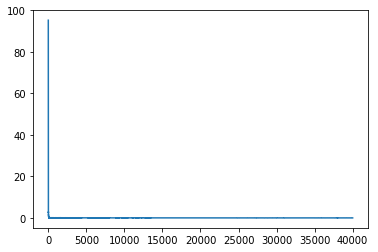

In [77]:
plt.plot(error_list)

In [78]:
Z_Train_Norm, A_Train_Norm = NN_forward(A0_Train_Norm, W, B, AF)

In [79]:
That_Train = de_minmaxNorm(A_Train_Norm[-1], min_T_Train, max_T_Train)
# That_Train = de_meanNorm(A_Train_Norm[-1], min_T_Train, max_T_Train, mean_T_Train)
# That_Train = de_standardization(A_Train_Norm[-1], mean_T_Train, std_T_Train)
# That_Train = de_SUL(A_Train_Norm[-1], ed_T_Train)

In [80]:
error_Train = find_error(T_Train, That_Train, 'MAPE')

In [81]:
error_Train

0.4427194468097374

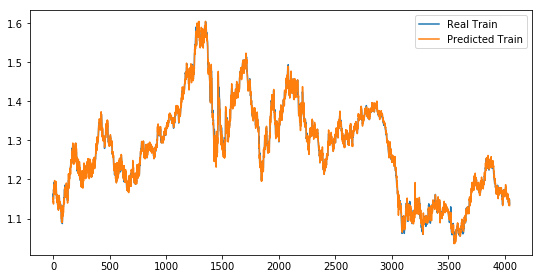

In [82]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(T_Train, label = 'Real Train')
plt.plot(That_Train, label = 'Predicted Train')
plt.legend()

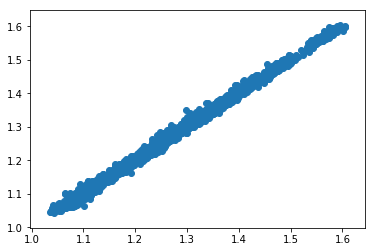

In [83]:
plt.scatter(That_Train, T_Train)

# 6. Make Prediction

In [84]:
A0_Test_Norm = minmaxNorm(A0_Test, min_A0_Train, max_A0_Train)
# A0_Test_Norm = meanNorm(A0_Test, min_A0_Train, max_A0_Train, mean_A0_Train)
# A0_Test_Norm = standardization(A0_Test, mean_A0_Train, std_A0_Train)
# A0_Test_Norm = SUL(A0_Test, ed_A0_Train)

T_Test_Norm = minmaxNorm(T_Test, min_T_Train, max_T_Train)
# T_Test_Norm = meanNorm(T_Test, min_T_Train, max_T_Train, mean_T_Train)
# T_Test_Norm = standardization(T_Test, mean_T_Train, std_T_Train)
# T_Test_Norm = SUL(T_Test, ed_T_Train)

In [85]:
Z_Test_Norm, A_Test_Norm = NN_forward(A0_Test_Norm, W, B, AF)

In [86]:
That_Test = de_minmaxNorm(A_Test_Norm[-1], min_T_Train, max_T_Train)
# That_Test = de_meanNorm(A_Test_Norm[-1], min_T_Train, max_T_Train, mean_T_Train)
# That_Test = de_standardization(A_Test_Norm[-1], mean_T_Train, std_T_Train)
# That_Test = de_SUL(A_Test_Norm[-1], ed_T_Train)

In [87]:
error_Test = find_error(T_Test, That_Test, 'MAPE')

In [88]:
error_Test

0.26218160018328746

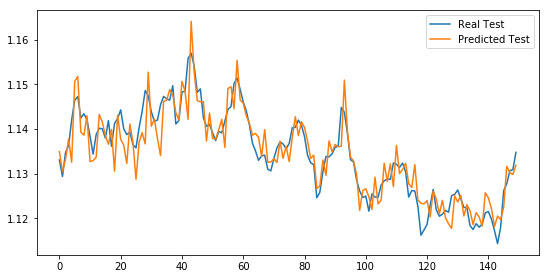

In [89]:
fig = plt.figure(figsize = (9, 4.5))
plt.plot(T_Test, label = 'Real Test')
plt.plot(That_Test, label = 'Predicted Test')
plt.legend()

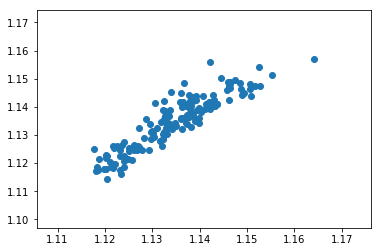

In [90]:
plt.scatter(That_Test, T_Test)

# 7. Zoom Result

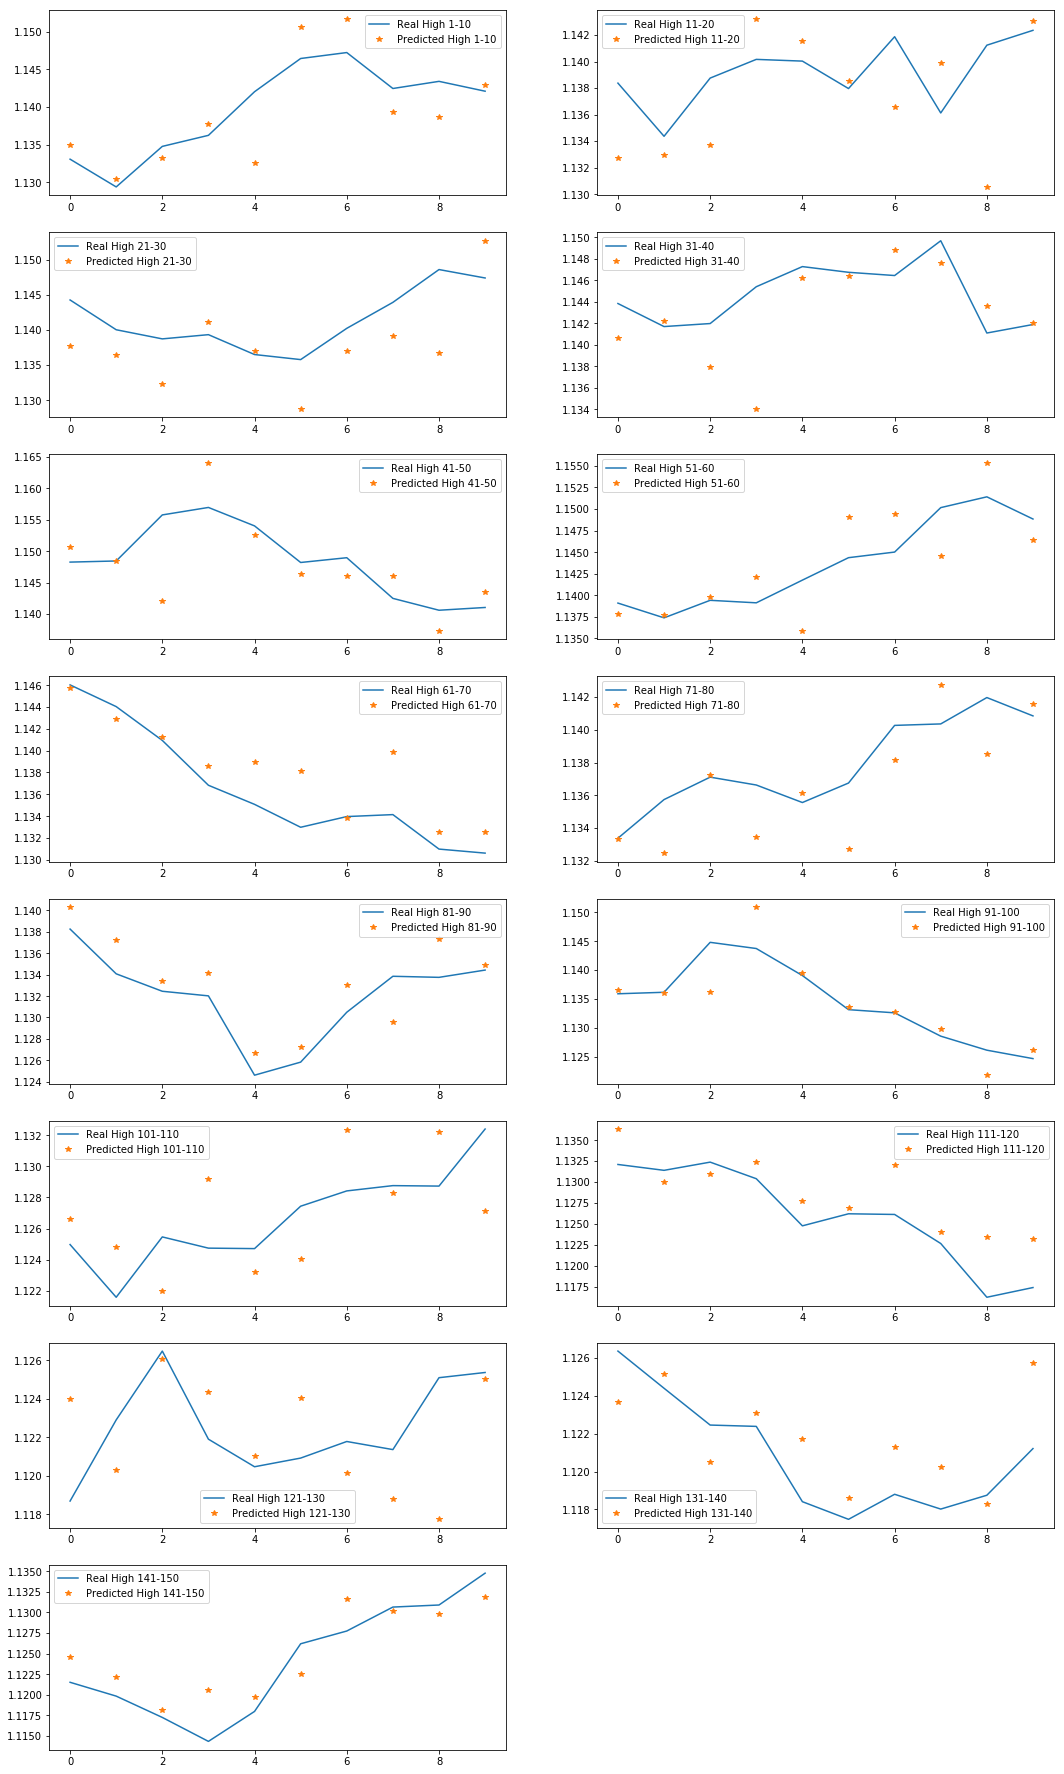

In [91]:
fig = plt.figure(figsize=(18, 32))

for i in range(15):
    plt.subplot(8, 2, i + 1)
    plt.plot(T_Test[10*i: 10*i + 10], label = 'Real High ' + str(i*10 + 1) + '-'  + str(i*10 + 10))
    plt.plot(That_Test[10*i: 10*i + 10], '*', label = 'Predicted High ' + str(i*10 + 1) + '-'  + str(i*10 + 10))
    plt.legend()